In [120]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [121]:
dir_name = "../results/piston__1000__50.00__0.30__31.42__1.00__0.00"
data_dir = dir_name + "/data/"

n_cells = 1000
data = pd.read_csv(data_dir + 'piston_r_u_p.txt', delimiter='\t', names=["x", 'r', 'u', 'p', 't'], index_col=False)
# data['x'] = data.index
length = int(len(data.index) / n_cells)

GAMMA = 5. / 3
c_v = 8.31 / (GAMMA - 1)
data['s'] = 1 + c_v * np.log(data['p'] / (data['r'] ** GAMMA))

filtered_data = data[(data['x'] > 0.49) & (data['x'] < 0.51)]

sorted_data = filtered_data.sort_values('t')

t_min = sorted_data['t'].min()
t_max = sorted_data['t'].max()
t_step = 0.1
t_interp = np.linspace(t_min, t_max + t_step, len(sorted_data['t'].unique()))

x_point = 0.5
r_interp = []
for t in t_interp:
    # выбрать ближайшие точки из отфильтрованных данных
    nearest_points = filtered_data[filtered_data['t'].between(t-t_step, t+t_step)]
    # выполнить линейную интерполяцию значений r на выбранном интервале времени
    interp_func = interp1d(nearest_points['x'], nearest_points['r'], kind='linear', fill_value="extrapolate")
    r_at_x_point = interp_func(x_point)
    r_interp.append(r_at_x_point)

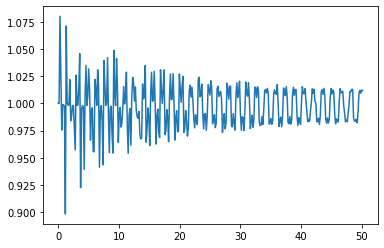

In [122]:
plt.plot(t_interp, r_interp)

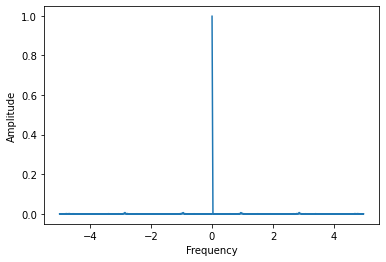

In [123]:
# Вычисление прямого преобразования Фурье
r_fft = np.fft.fft(r_interp)

# Вычисление частот
freqs = np.fft.fftfreq(len(r_interp), t_step)

# Вычисление амплитуд
amplitudes = np.abs(r_fft) / len(r_interp)

# Визуализация графиков
plt.plot(freqs, amplitudes)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


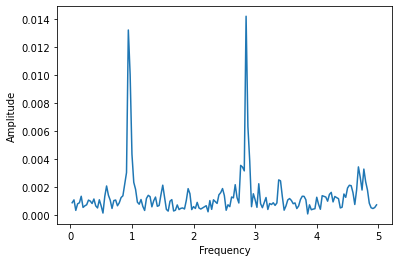

In [124]:
# получение спектра Фурье
r_fft = np.fft.fft(r_interp)

# перемещение отрицательных частот в начало массива
r_fft_shifted = np.fft.fftshift(r_fft)

# отображение только второй половины массива
N = len(r_fft)
freq = np.fft.fftfreq(N, d=t_step)
freq_shifted = np.fft.fftshift(freq)

mask = freq_shifted > 0
freq_pos = freq_shifted[mask]
r_fft_pos = 2.0/N * np.abs(r_fft_shifted[mask])

# построение графика
plt.plot(freq_pos, r_fft_pos)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


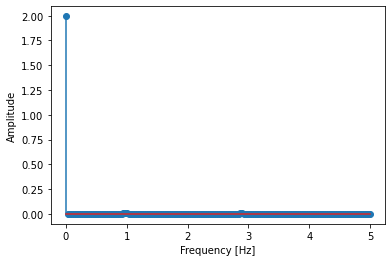

In [125]:
import matplotlib.pyplot as plt
import numpy as np

fft_r_interp = np.fft.fft(r_interp)

# Получить массив амплитуд
amplitudes = 2.0 / N * np.abs(fft_r_interp[:N//2])

# Получить массив частот
freqs = np.linspace(0.0, 1.0/(2.0*t_step), N//2)

# Построить график
fig, ax = plt.subplots()
ax.stem(freqs, amplitudes)

# Настроить метки осей
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude')

# Показать график
plt.show()


In [126]:
import plotly.graph_objects as go

fig = go.Figure()

# добавляем вертикальные линии для правой части спектра Фурье
fig.add_trace(go.Scatter(x=freqs, y=amplitudes, mode='lines'))

# задаем заголовок и метки осей
fig.update_layout(title='Spectrum of r(t)', xaxis_title='Frequency', yaxis_title='Amplitude')

# выводим график
fig.show()